In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('savedData/covid19data.csv')
data = data.iloc[:, 1:]
data

/home/nikhere/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Num Cases,Date Announced,Age Bracket,Gender,Detected City,Detected District,Detected State,Current Status,Day,Month,Year
0,1.0,30/01/2020,20,F,Thrissur,Thrissur,Kerala,Recovered,30,1,2020
1,1.0,02/02/2020,NaN,NaN,Alappuzha,Alappuzha,Kerala,Recovered,2,2,2020
2,1.0,03/02/2020,NaN,NaN,Kasaragod,Kasaragod,Kerala,Recovered,3,2,2020
3,1.0,02/03/2020,45,M,East Delhi (Mayur Vihar),East Delhi,Delhi,Recovered,2,3,2020
4,1.0,02/03/2020,24,M,Hyderabad,Hyderabad,Telangana,Recovered,2,3,2020
...,...,...,...,...,...,...,...,...,...,...,...
145854,2.0,07/07/2020,NaN,NaN,NaN,Dadra and Nagar Haveli,Dadra and Nagar Haveli and Daman and Diu,Hospitalized,7,7,2020
145855,-9.0,07/07/2020,NaN,NaN,NaN,NaN,Sikkim,Recovered,7,7,2020
145856,-6.0,07/07/2020,NaN,NaN,NaN,NaN,Sikkim,Recovered,7,7,2020
145857,-1.0,07/07/2020,NaN,NaN,NaN,Kozhikode,Kerala,Recovered,7,7,2020


In [2]:
Day = data[data['Current Status']=='Hospitalized'].groupby(['Month', 'Day'])[['Num Cases']].sum()
Day

Num Cases
Month Day           
3     4          5.0
      5          1.0
      7          2.0
      9          4.0
      10         4.0
...              ...
7     3      22718.0
      4      24018.0
      5      23942.0
      6      22500.0
      7      23147.0

[124 rows x 1 columns]

In [3]:
x = np.arange(len(Day))
y = Day.values

In [4]:
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

In [5]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()

X = sc_x.fit_transform(x)                            # X = (x-mean(x))/S.D(x)        for every x
Y = sc_y.fit_transform(y)                            # Y = (y-mean(y))/S.D(y)        for every y


In [10]:
from sklearn.svm import SVR
reg = SVR(kernel='rbf')
reg.fit(X, Y.ravel())                                #ravel() will convert 2D to 1D


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [11]:
reg.score(X, Y)*100

98.55265297205547

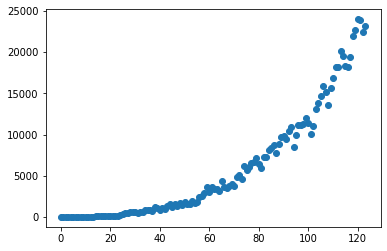

In [13]:
plt.scatter(x, y)
plt.show()

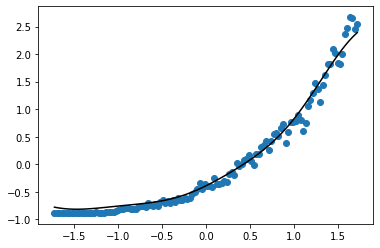

In [15]:
Yp = reg.predict(X)

plt.scatter(X, Y)
plt.plot(X, Yp, color='black')
plt.show()